# Processing TESS sector 3 data for TOI4504

In [2]:
%matplotlib inline
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
path = '../research/star_systems/TOI-4504/lightkurve/'

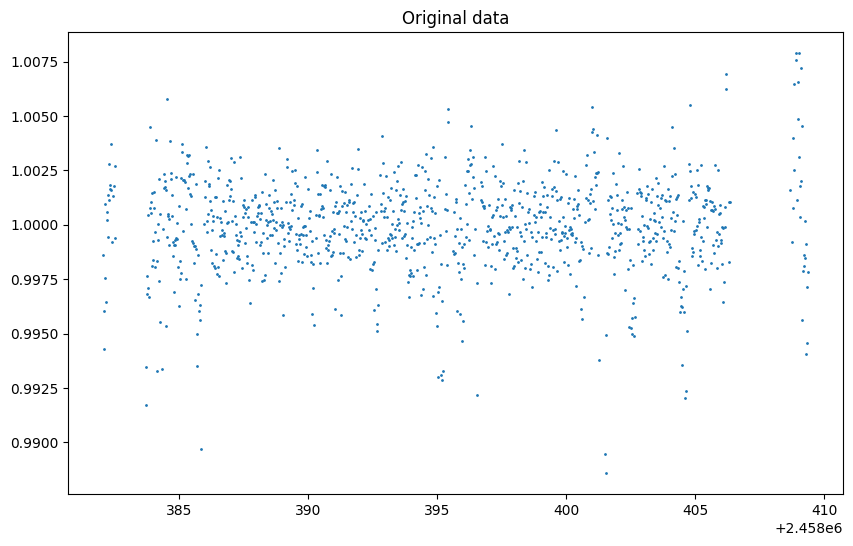

,time,flux,flux_err
0,2.458382e+06,0.998623,NaN
1,2.458382e+06,0.994293,NaN
2,2.458382e+06,0.996031,NaN
3,2.458382e+06,0.997553,NaN
4,2.458382e+06,1.000941,NaN
...,...,...,...
1060,2.458409e+06,0.994040,NaN
1061,2.458409e+06,0.999124,NaN
1062,2.458409e+06,0.994571,NaN
1063,2.458409e+06,0.997155,NaN


In [3]:
full_path = path+"3/3_TGLC_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

In [4]:
df = calculate_flux_err(df, window_length=101)
df

,time,flux,flux_err
0,2.458382e+06,0.998623,0.002880
1,2.458382e+06,0.994293,0.002872
2,2.458382e+06,0.996031,0.002873
3,2.458382e+06,0.997553,0.002868
4,2.458382e+06,1.000941,0.002858
...,...,...,...
1060,2.458409e+06,0.994040,0.003365
1061,2.458409e+06,0.999124,0.003396
1062,2.458409e+06,0.994571,0.003419
1063,2.458409e+06,0.997155,0.003453


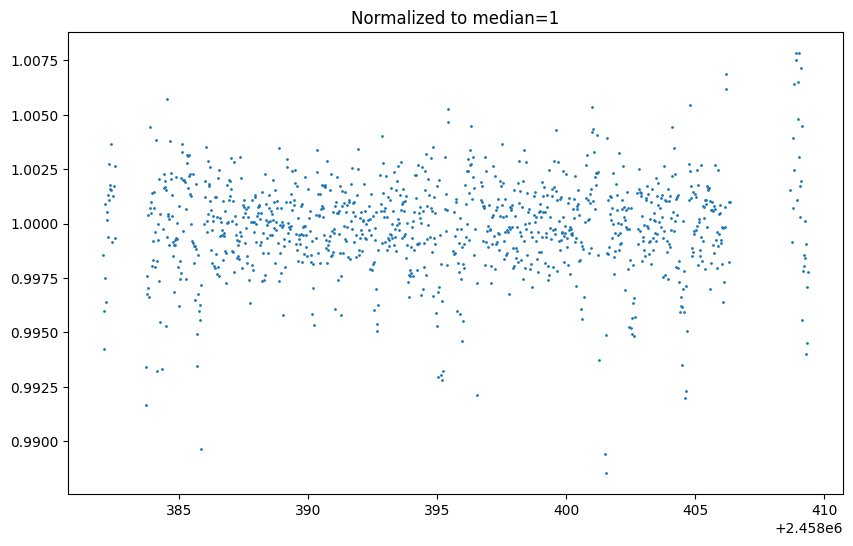

,time,flux,flux_err
0,2.458382e+06,0.998571,0.002880
1,2.458382e+06,0.994240,0.002871
2,2.458382e+06,0.995978,0.002873
3,2.458382e+06,0.997500,0.002868
4,2.458382e+06,1.000888,0.002858
...,...,...,...
1060,2.458409e+06,0.993988,0.003365
1061,2.458409e+06,0.999071,0.003396
1062,2.458409e+06,0.994519,0.003419
1063,2.458409e+06,0.997102,0.003452


In [4]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [5]:
df2csv(df, full_path[:-4]+"_p.csv")